In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_iris=pd.read_csv("/kaggle/input/iris-dataset/iris.csv")

In [4]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
target_0 = np.zeros(50); target_1 = np.zeros(50)+1; target_2 = np.zeros(50)+2
target = np.hstack((target_0,target_1,target_2))
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

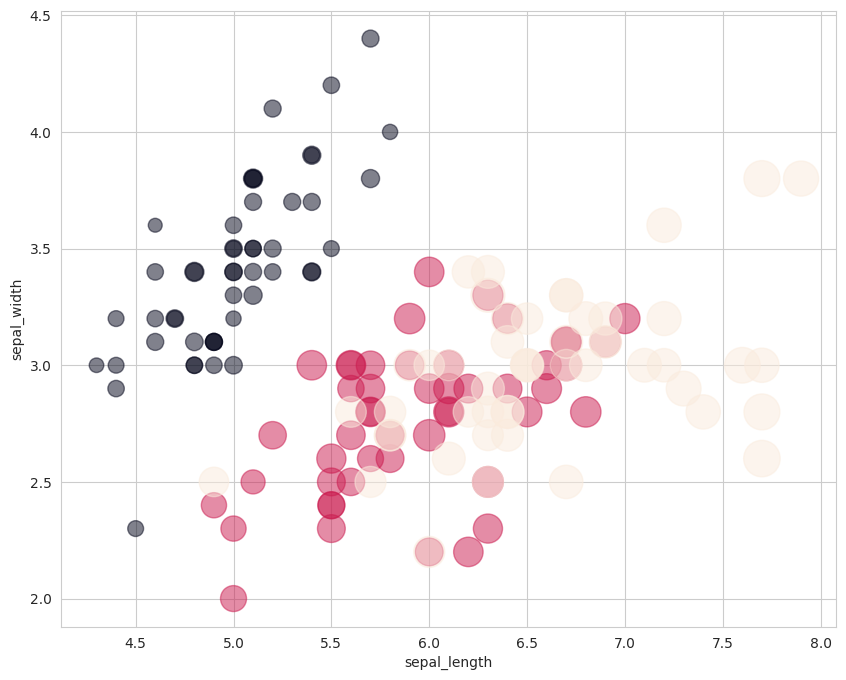

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(data_iris['sepal_length'], data_iris['sepal_width'], c=target, alpha=0.5, s=data_iris['petal_length']*100)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [8]:
import seaborn as sns

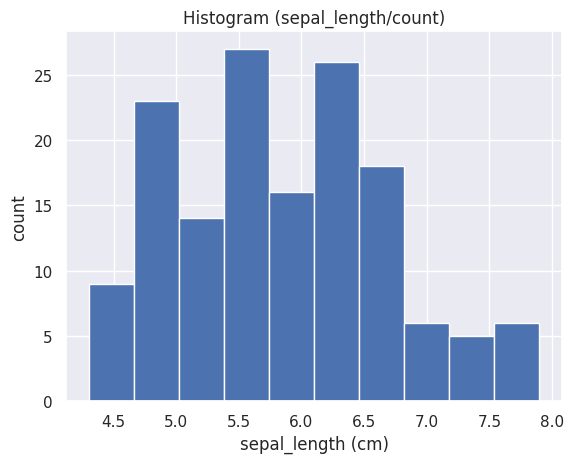

In [9]:
sns.set()
plt.hist(data_iris['sepal_length'])
plt.xlabel('sepal_length (cm)')
plt.ylabel('count')
plt.title('Histogram (sepal_length/count)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


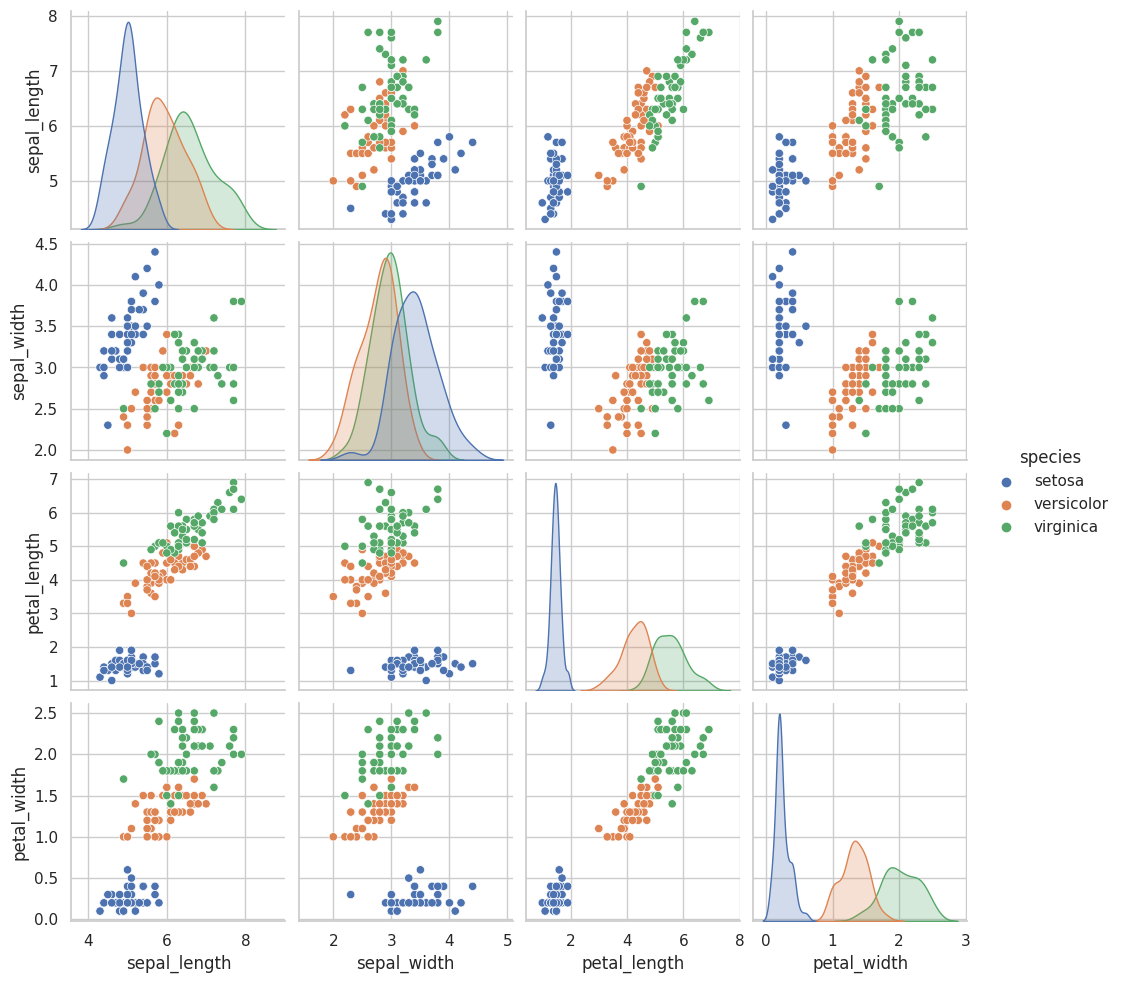

In [10]:
sns.set_style("whitegrid")
sns.pairplot(data_iris, hue='species')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_iris, target, test_size=0.2)

print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape : (120, 5)
X_test shape : (30, 5)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

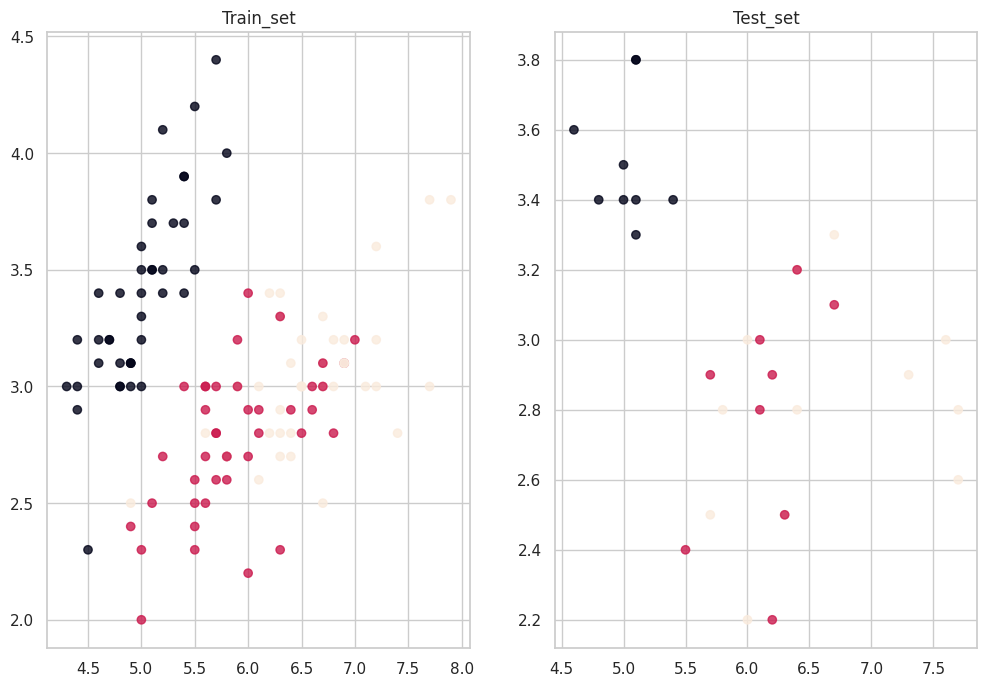

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, alpha=0.8)
plt.title("Train_set")
plt.subplot(122)
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, alpha=0.8)
plt.title("Test_set")
plt.show()

In [15]:
model = KNeighborsClassifier()

X_train = X_train[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']]
X_test = X_test[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']]

model.fit(X_train, y_train)

print("Score train :", model.score(X_train, y_train))
print("Score Test :", model.score(X_test, y_test))


Score train : 0.9833333333333333
Score Test : 0.9666666666666667


In [16]:
from sklearn.model_selection import validation_curve

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
grid.best_score_

0.9666666666666668

In [20]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [21]:
model = grid.best_estimator_


In [22]:
model.score(X_test, y_test)

0.9666666666666667

In [23]:
from sklearn.model_selection import learning_curve

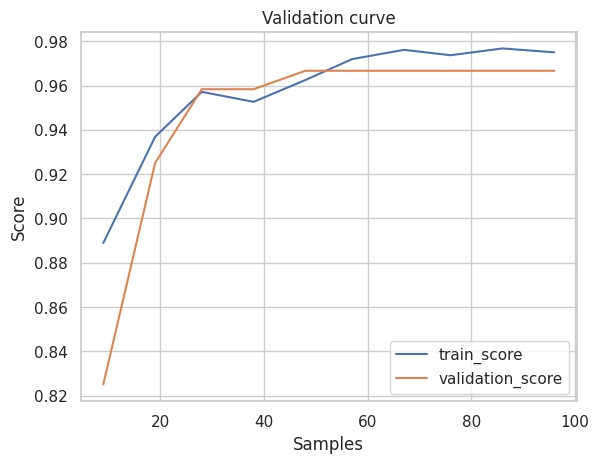

In [24]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)

plt.figure()
plt.plot(N, train_score.mean(axis=1), label='train_score')
plt.plot(N, val_score.mean(axis=1), label='validation_score')
plt.legend()
plt.title("Validation curve")
plt.xlabel('Samples')
plt.ylabel('Score')
plt.show()

In [25]:
def predict_flowers(model, sepal_length, sepal_width, petal_length, petal_width):
    X_predict = np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1,4)
    predict_value = model.predict(X_predict)
    print("predict :", predict_value)
    print("predict proba :", model.predict_proba(X_predict))

In [26]:
predict_flowers(model, 5.1,3.5,1.4,0.2)

predict : [0.]
predict proba : [[1. 0. 0.]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
predict_flowers(model, 5.0, 2.0, 3.5,1.0)

predict : [1.]
predict proba : [[0. 1. 0.]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
predict_flowers(model, 6.9, 3.2 ,5.7 ,2.3)

predict : [2.]
predict proba : [[0. 0. 1.]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
